## **When to use which graph**


*   **Bar Chart** - To compare categorical data
*   **Line chart** - To display the trend of contineous data
*   **Histogram** - To visualise distribution of single data item
*   **Heatmap** - To plot correlation of different data items in dataframe
*   **Pie chart** - To show proportion or % of participation of different categories of same data item
*   **Scatter plot** - For exploring relationship between 2 data variables
*   **Box plot** - To display quantiles/distribution of data for mean,
median and outliers










In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Newyork_hotels.txt', sep=',')

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


## **Bar Chart - To display count of hotels in each city of NewYork**

For bar plot, it is important to have one numerical data

In [4]:
for city in data['neighbourhood_group'].unique():
    count = data['neighbourhood_group'].value_counts()[city]
    print('city:', city,'count:', count)


city: Brooklyn count: 20107
city: Manhattan count: 21669
city: Queens count: 5666
city: Staten Island count: 373
city: Bronx count: 1091


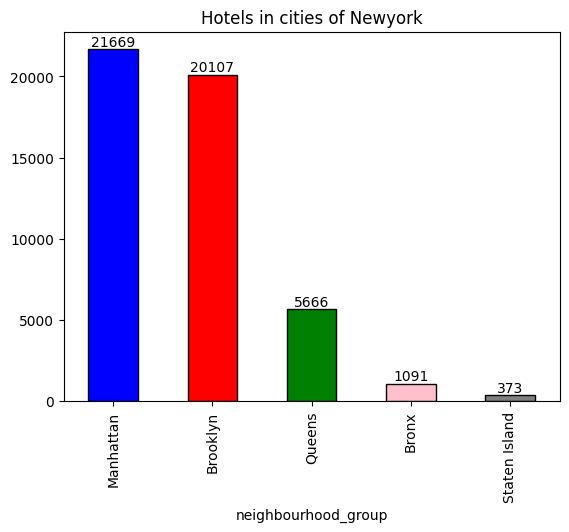

In [5]:
# ax = sns.countplot(data = data,x='neighbourhood_group',
#               palette='Set2',hue='room_type')
# plt.title('Number of hotels in Newyork')
# plt.legend(labels=data['neighbourhood_group'].unique(), title='Cities')
# for container in ax.containers: # to add value labels
#     ax.bar_label(container)

#Another way to plot bar graph
ax= data['neighbourhood_group'].value_counts().plot(kind='bar',color=['blue','red','green','pink','grey'], title='Hotels in cities of Newyork',edgecolor='black')

for container in ax.containers: # to add value labels
    ax.bar_label(container)

#edge color is used for edges in bar plot, wedgeprops is used in pie and doughnut charts
#hue to add another categorical data



Same Bar plot can be plotted as **strip plot** as well

<Axes: xlabel='neighbourhood_group', ylabel='price'>

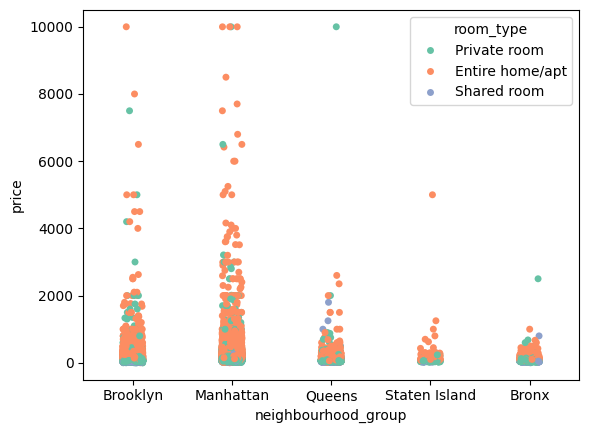

In [6]:
sns.stripplot(data = data,x='neighbourhood_group',
              y = 'price',
             palette='Set2', hue = 'room_type')


## **Stacked bar plot - more categories in one bar**

<Axes: xlabel='neighbourhood_group', ylabel='price'>

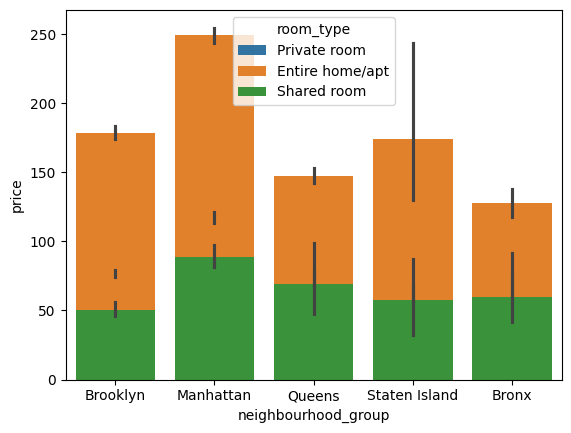

In [7]:
sns.barplot(x='neighbourhood_group',
              y = 'price',hue = 'room_type',data=data,dodge=False)

#stacked='True' is not valid for sns.barplot

## **Plot stacked bar graph for max price for a given neighbourhood_group and room-type combination**

In [8]:
city_unique = data['neighbourhood_group'].unique()
room_type_unique = data['room_type'].unique()

new_data = pd.DataFrame()
new_data_city = []
new_data_room_type = []
new_data_min_price = []
new_data_max_price = []

for city in city_unique:
    for room_type in room_type_unique:
        filtered_data = pd.DataFrame()  #reset dataframe

        new_data_city.append(city)
        new_data_room_type.append(room_type)

        filtered_data = data[(data['neighbourhood_group'] == city) & (data['room_type'] == room_type)]

        new_data_min_price.append(filtered_data['price'].min())
        new_data_max_price.append(filtered_data['price'].max())

new_data['city'] = new_data_city
new_data['room_type'] = new_data_room_type
new_data['min_price'] = new_data_min_price
new_data['max_price'] = new_data_max_price

new_data




,city,room_type,min_price,max_price
0,Brooklyn,Private room,0,7500
1,Brooklyn,Entire home/apt,0,10000
2,Brooklyn,Shared room,0,725
3,Manhattan,Private room,10,9999
4,Manhattan,Entire home/apt,0,10000
5,Manhattan,Shared room,10,1000
6,Queens,Private room,10,10000
7,Queens,Entire home/apt,10,2600
8,Queens,Shared room,11,1800
9,Staten Island,Private room,20,300


<Axes: xlabel='city', ylabel='max_price'>

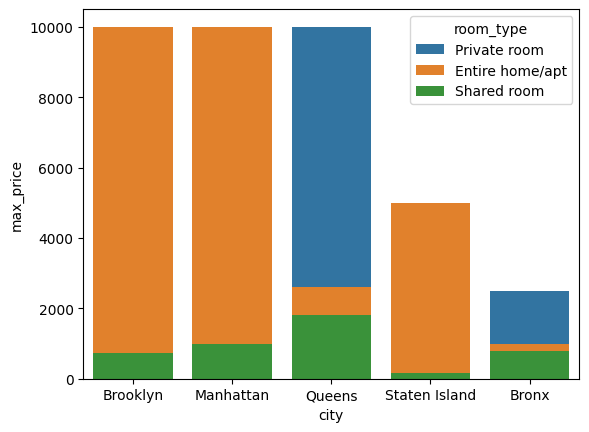

In [9]:
sns.barplot(x='city',
              y= 'max_price',hue = 'room_type',data=new_data,dodge=False)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                          48325         43546         3588
Brooklyn                     1704773        775248        20868
Manhattan                    3290312        932439        42709
Queens                        308218        241983        13666
Staten Island                  30597         11711          517


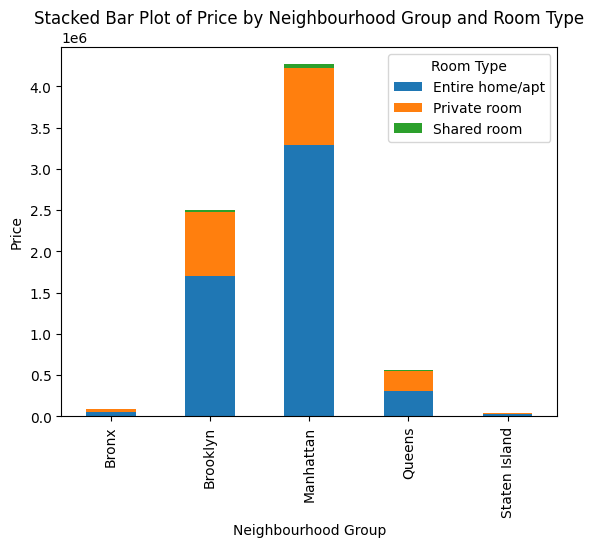

In [10]:
grouped_data = data.groupby(['neighbourhood_group', 'room_type'])['price'].sum().reset_index()
pivot_data = grouped_data.pivot(index='neighbourhood_group', columns='room_type', values='price')
print(pivot_data)
pivot_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Price by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

## **Pie Chart - To display distribution of different types of rooms**



In [30]:
 labels=room_counts.index
 labels

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [31]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,25414
Private room,22332
Shared room,1160


In [32]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Distribution of room types in Newyork hotels')

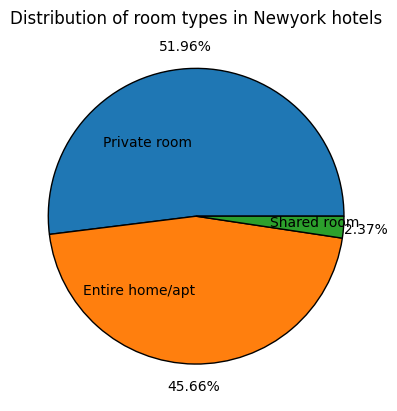

In [27]:
plt.pie(data['room_type'].value_counts(),labels=data['room_type'].index(),labeldistance=0.5,autopct='%.2f%%',pctdistance=1.15,wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

plt.title('Distribution of room types in Newyork hotels')

#another way to display pie chart
# data['room_type'].value_counts().plot(kind='pie',autopct='%.2f%%',wedgeprops={'linewidth':1,'edgecolor':'black'})

#autopct to display % of distribution,
#labels to add labels for each category
#wedgeprops for highlighting border
#labeldistance to add labels inside or outside pie chart
#pctdistace to add value labels inside or outside pie chart
#.index() - should be used while plotting contineous data in x axis
#.unique() - should be used while plotting categorical data like in bar chart



## **Line chart to display average price of hotel rooms in cities of Newyork**

  neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.379022
2           Manhattan  196.846186
3              Queens   99.517649
4       Staten Island  114.812332


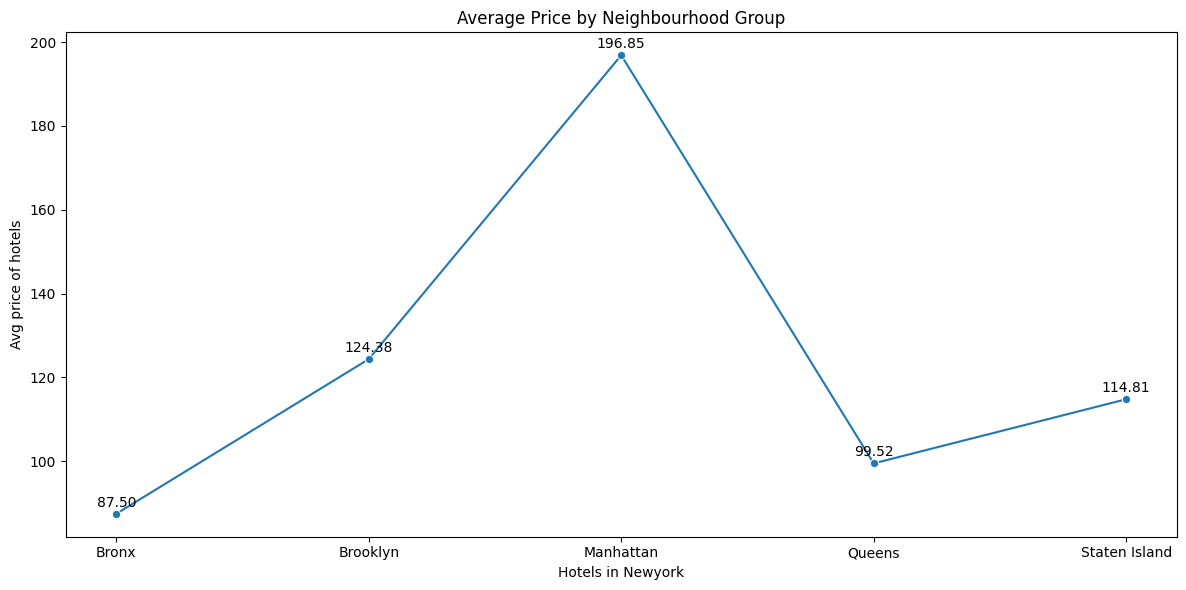

In [36]:
hotels = data.groupby('neighbourhood_group')['price'].mean().reset_index()

print(hotels)

plt.figure(figsize=(12, 6))

ax = sns.lineplot(x='neighbourhood_group', y='price', data=hotels, marker='o')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Hotels in Newyork')
plt.ylabel('Avg price of hotels')

# Add value labels
for index, row in hotels.iterrows():
    ax.text(row['neighbourhood_group'], row['price'] + 1, f"{row['price']:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

Boxplot to identify

In [13]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<ipython-input-14-46044bcc9f8a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = titanic.groupby('class')['age'].quantile([0.25, 0.5, 0.75])


class       
First   0.25    27.0
        0.50    37.0
        0.75    49.0
Second  0.25    23.0
        0.50    29.0
        0.75    36.0
Third   0.25    18.0
        0.50    24.0
        0.75    32.0
Name: age, dtype: float64

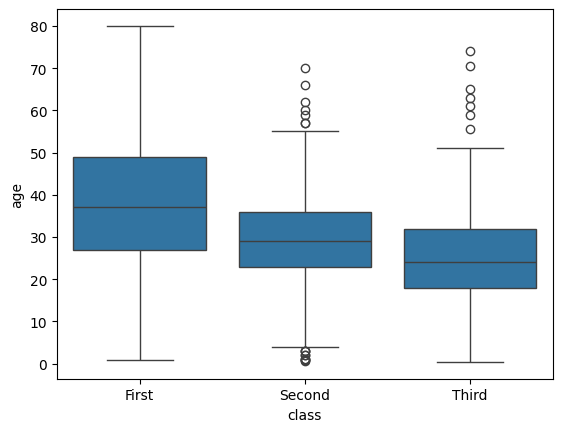

In [14]:
ax = sns.boxplot(x='class',y='age',data=titanic)#,hue='survived')

quantiles = titanic.groupby('class')['age'].quantile([0.25, 0.5, 0.75])

quantiles



In the above box plot, first class has no outliers, 2nd class has outliers above the 75% of data n below 25% of data, 3rd class has outliers above the 75% of data. hue can be added to add another category 'survived'

#Same can be plot as violin plot

<ipython-input-15-113668134d5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class',y='age',data=titanic, palette=['blue','orange','green'])


<Axes: xlabel='class', ylabel='age'>

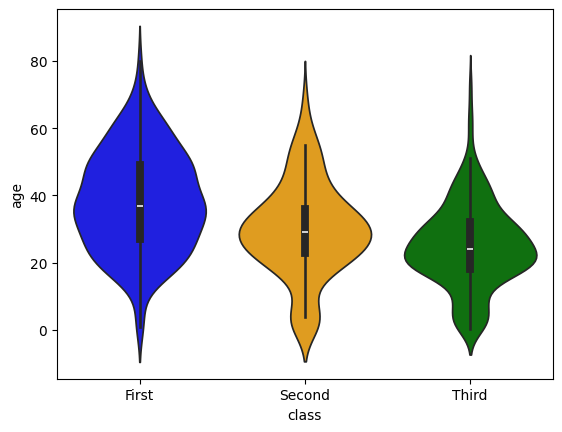

In [15]:
sns.violinplot(x='class',y='age',data=titanic, palette=['blue','orange','green'])

## **Heatmap** - for heat map all the values should be numeric

In [16]:
x = pd.crosstab(titanic['survived'], titanic['class'])
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='class', ylabel='survived'>

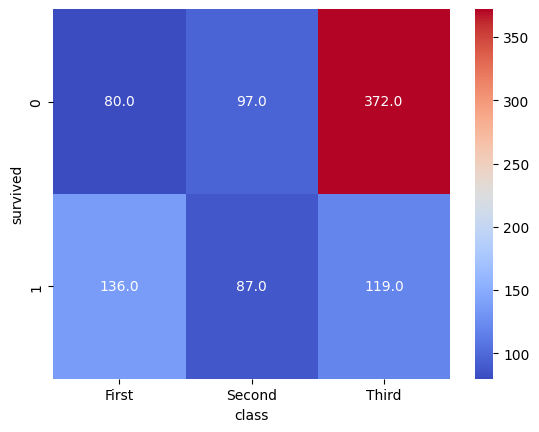

In [17]:
sns.heatmap(x, annot=True ,fmt= '.1f',cmap='coolwarm')

#fmt is to round off the value
#cmap is to change the color

## **Scatter plot - To plot relation between data items**  

<Axes: xlabel='class', ylabel='fare'>

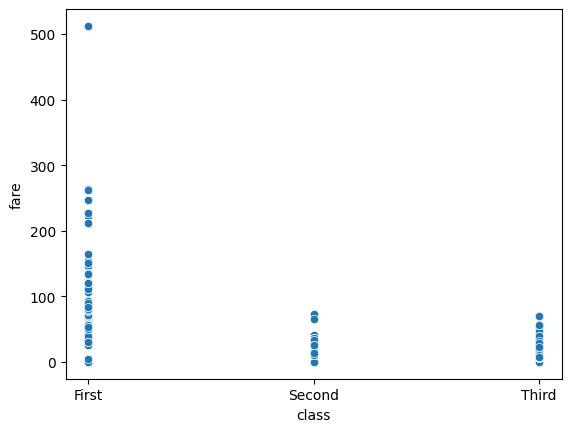

In [18]:
sns.scatterplot(data=titanic, x= 'class', y ='fare')